In [54]:
import sys
import scipy as sc
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix


In [55]:
#get dataset from university of california irvine 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
#df = pd.read_csv(url, names=names)
df = pd.read_csv("data-sources/breast-cancer-wisconsin.data", names=names)

In [56]:
#preprocessing 
df.replace('?',-99999, inplace=True)
print(df.axes)

df.drop(['id'], 1, inplace=True)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]


In [57]:
#EDA
print(df.shape, "\n", "\n", df.loc[10], "\n","\n", df.describe())


(699, 10) 
 
 clump_thickness           1
uniform_cell_size         1
uniform_cell_shape        1
marginal_adhesion         1
single_epithelial_size    1
bare_nuclei               1
bland_chromatin           3
normal_nucleoli           1
mitoses                   1
class                     2
Name: 10, dtype: object 
 
        clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         699.00000

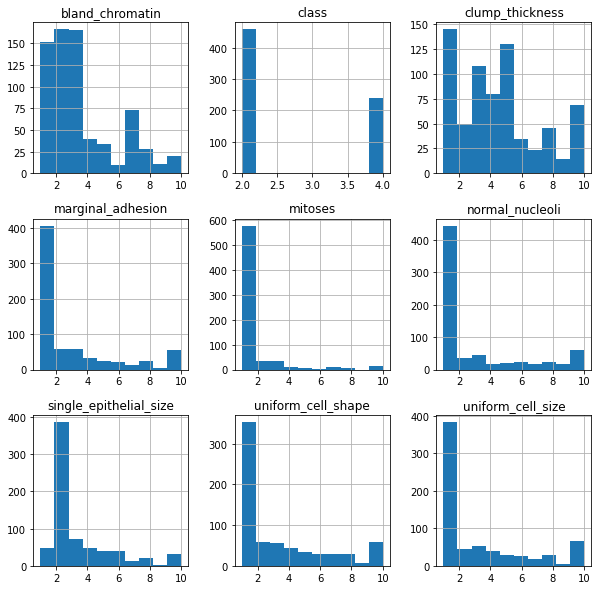

In [58]:
#create histogram subplots for all variables 
df.hist(figsize= (10,10))
plt.show()

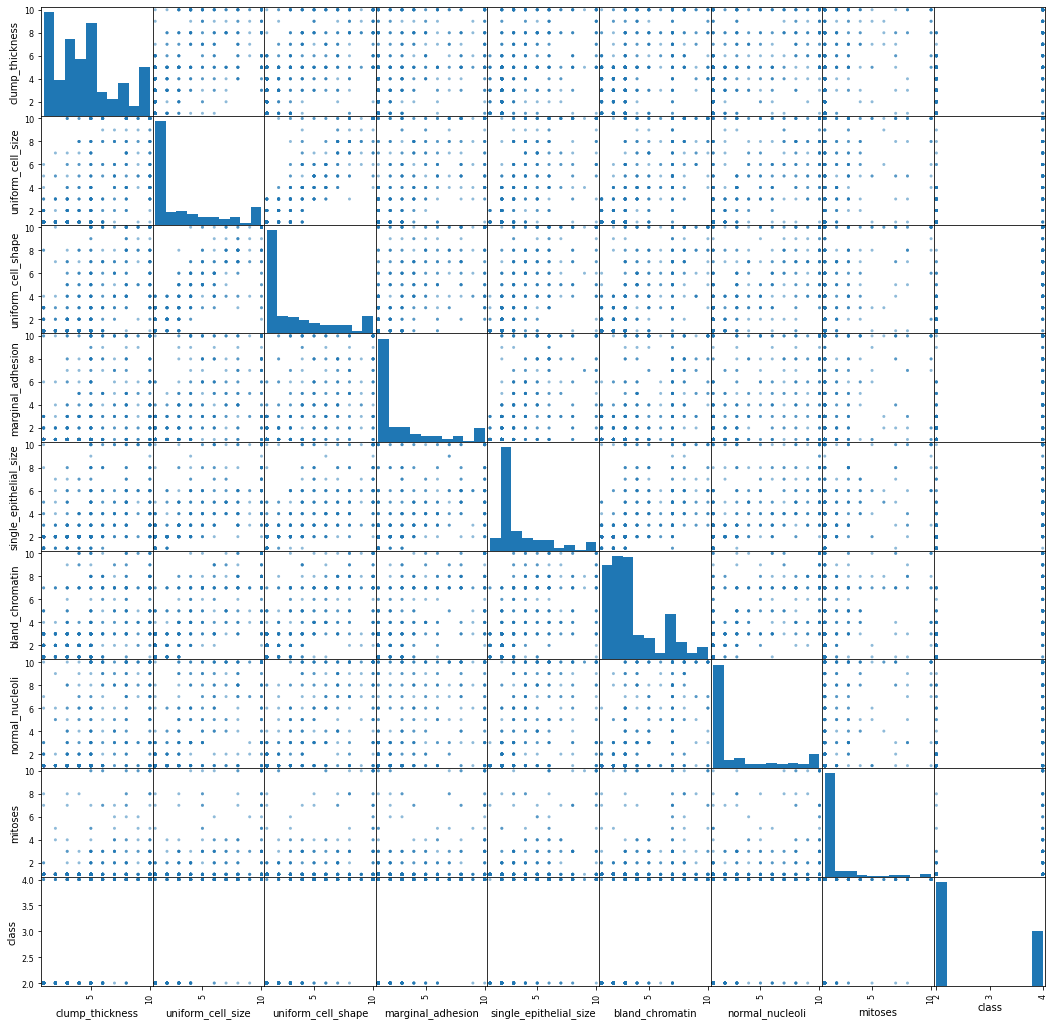

In [59]:
#create scatter matrix for all variables
scatter_matrix(df, figsize=(18,18))
plt.show()

In [60]:
#create training sets for x and y
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [61]:
#testing selections
seed = 8
scoring = 'accuracy'

In [62]:
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 10)))
models.append(('SVM', SVC()))

#evaluate
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state= seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.967727 (0.026441)
SVM: 0.652760 (0.054068)


In [63]:
#predictions on validation dataset

for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))

KNN
0.95
              precision    recall  f1-score   support

           2       0.95      0.98      0.96        93
           4       0.95      0.89      0.92        47

    accuracy                           0.95       140
   macro avg       0.95      0.94      0.94       140
weighted avg       0.95      0.95      0.95       140

SVM
0.6642857142857143
              precision    recall  f1-score   support

           2       0.66      1.00      0.80        93
           4       0.00      0.00      0.00        47

    accuracy                           0.66       140
   macro avg       0.33      0.50      0.40       140
weighted avg       0.44      0.66      0.53       140



In [64]:

clf = SVC()

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example_measures = np.array([[4,2,1,1,1,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
print(prediction)

0.6642857142857143
[2]
